In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import re

In [ ]:
import torch

In [ ]:
# First trial of educational game scenario
# Load pre-trained GPT-2 model and tokenizer
model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

def generate_tutor_dialogue(prompt, max_length=100, temperature=1.1, top_p=0.92, top_k=80):
    # Tokenize the input prompt
    inputs = tokenizer(prompt, return_tensors="pt")

    # Generate the attention mask
    attention_mask = inputs['attention_mask']

    # Generate text with sampling enabled
    outputs = model.generate(
        inputs['input_ids'],
        attention_mask=attention_mask,  # Pass attention mask
        max_length=max_length,
        num_return_sequences=1,
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        pad_token_id=tokenizer.eos_token_id,  # Set padding to eos token
        do_sample=True  # Enable sampling
    )

    # Decode the generated text
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

def filter_dialogue(text, rules):
    for rule in rules:
        if not rule(text):
            return False
    return True

def educational_relevance_rule(text):
    # Rule to check if the dialogue stays on the topic of Python coding
    relevant_keywords = ['Python', 'variable', 'loop', 'function', 'if', 'else', 'syntax', 'error', 'list', 'dictionary', 'tuple', 'class', 'object']
    return any(keyword in text for keyword in relevant_keywords)

def performance_metrics(dialogues):
    # Assess performance: measure coherence, relevance, and diversity
    repetition_count = sum(1 for d in dialogues if len(set(d.split())) < len(d.split()) * 0.7)  # 30% or more repeated words
    rule_violations = sum(1 for d in dialogues if not educational_relevance_rule(d))
    unique_dialogues = len(set(dialogues))

    # Print results
    print(f"\nPerformance Results:")
    print(f"Total Generations: {len(dialogues)}")
    print(f"Repetitive Outputs: {repetition_count}")
    print(f"Rule Violations (Irrelevant Content): {rule_violations}")
    print(f"Unique Dialogues Generated: {unique_dialogues}")
    print(f"Coherence Rate: {((len(dialogues) - repetition_count) / len(dialogues)) * 100:.2f}%")
    print(f"Context Relevance Rate: {((len(dialogues) - rule_violations) / len(dialogues)) * 100:.2f}%")

# Expanded Example Prompts for Python Coding Course
prompts = [
    "Tutor: Let's learn about variables in Python. Can you tell me what a variable is?",
    "Tutor: Now that you know variables, let's move on to loops. What do you think loops are used for in Python?",
    "Tutor: Great job! Let's try functions next. Can you explain what a function is in Python?",
    "Tutor: Sometimes you will run into errors. What are some common Python errors you've encountered?",
    "Tutor: What is a list in Python and how do you create one?",
    "Tutor: Explain the difference between a list and a tuple in Python.",
    "Tutor: How do you define a dictionary in Python, and what are its key uses?",
    "Tutor: What is a class in Python, and how do you create one?",
    "Tutor: Can you explain what an object is in Python and how it relates to a class?",
    "Tutor: How does error handling work in Python, and what is a try-except block used for?"
]

generated_dialogues = []

# Generate and print dialogues with their prompts
print("Generated Questions and Answers:\n")
for prompt in prompts:
    for _ in range(2):  # Generate two dialogues per prompt
        dialogue = generate_tutor_dialogue(prompt)
        generated_dialogues.append(dialogue)
        # Print the question and generated answer
        print(f"Q: {prompt}")
        print(f"A: {dialogue}\n")

# Filter and evaluate generated dialogues
filtered_dialogues = [d for d in generated_dialogues if filter_dialogue(d, [educational_relevance_rule])]

# Display performance results
performance_metrics(generated_dialogues)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Generated Questions and Answers:

Q: Tutor: Let's learn about variables in Python. Can you tell me what a variable is?
A: Tutor: Let's learn about variables in Python. Can you tell me what a variable is? What about the type of a variable? It is very important to understand that Python's type system is not a linear system, it is a "loose, binary" system, there are many different types of variables and variables have a certain kind of property: the set of they have. So if there is only one possible variable and there is only one "variable", then it is "loose

Q: Tutor: Let's learn about variables in Python. Can you tell me what a variable is?
A: Tutor: Let's learn about variables in Python. Can you tell me what a variable is?

A. I don't really like to know, so I'll just call it a variable.

But let's take a look at it for a moment. So, let's imagine we're dealing with the same problem of being able to generate a set of integers from 3.0 to 100. Let's assume that the output to the progra

In [ ]:
# Second trial with parameter updates
# Load pre-trained GPT-2 model and tokenizer
model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

def generate_tutor_dialogue(prompt, max_length=100, temperature=1.3, top_p=0.95, top_k=100):
    # Tokenize the input prompt
    inputs = tokenizer(prompt, return_tensors="pt")

    # Generate the attention mask
    attention_mask = inputs['attention_mask']

    # Generate text with sampling enabled
    outputs = model.generate(
        inputs['input_ids'],
        attention_mask=attention_mask,  # Pass attention mask
        max_length=max_length,
        num_return_sequences=1,
        temperature=temperature,  # Adjusted temperature
        top_p=top_p,  # Adjusted top_p
        top_k=top_k,  # Adjusted top_k
        pad_token_id=tokenizer.eos_token_id,  # Set padding to eos token
        do_sample=True  # Enable sampling
    )

    # Decode the generated text
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

def filter_dialogue(text, rules):
    for rule in rules:
        if not rule(text):
            return False
    return True

def educational_relevance_rule(text):
    # Rule to check if the dialogue stays on the topic of Python coding
    relevant_keywords = ['Python', 'variable', 'loop', 'function', 'if', 'else', 'syntax', 'error', 'list', 'dictionary', 'tuple', 'class', 'object']
    return any(keyword in text for keyword in relevant_keywords)

def performance_metrics(dialogues):
    # Assess performance: measure coherence, relevance, and diversity
    repetition_count = sum(1 for d in dialogues if len(set(d.split())) < len(d.split()) * 0.7)  # 30% or more repeated words
    rule_violations = sum(1 for d in dialogues if not educational_relevance_rule(d))
    unique_dialogues = len(set(dialogues))

    # Print results
    print(f"\nPerformance Results:")
    print(f"Total Generations: {len(dialogues)}")
    print(f"Repetitive Outputs: {repetition_count}")
    print(f"Rule Violations (Irrelevant Content): {rule_violations}")
    print(f"Unique Dialogues Generated: {unique_dialogues}")
    print(f"Coherence Rate: {((len(dialogues) - repetition_count) / len(dialogues)) * 100:.2f}%")
    print(f"Context Relevance Rate: {((len(dialogues) - rule_violations) / len(dialogues)) * 100:.2f}%")

# Expanded Example Prompts for Python Coding Course
prompts = [
    "Tutor: Let's learn about variables in Python. Can you tell me what a variable is?",
    "Tutor: Now that you know variables, let's move on to loops. What do you think loops are used for in Python?",
    "Tutor: Great job! Let's try functions next. Can you explain what a function is in Python?",
    "Tutor: Sometimes you will run into errors. What are some common Python errors you've encountered?",
    "Tutor: What is a list in Python and how do you create one?",
    "Tutor: Explain the difference between a list and a tuple in Python.",
    "Tutor: How do you define a dictionary in Python, and what are its key uses?",
    "Tutor: What is a class in Python, and how do you create one?",
    "Tutor: Can you explain what an object is in Python and how it relates to a class?",
    "Tutor: How does error handling work in Python, and what is a try-except block used for?"
]

generated_dialogues = []

# Generate and print dialogues with their prompts
print("Generated Questions and Answers:\n")
for prompt in prompts:
    for _ in range(2):  # Generate two dialogues per prompt
        dialogue = generate_tutor_dialogue(prompt)
        generated_dialogues.append(dialogue)
        # Print the question and generated answer
        print(f"tokenizer = GPT2Tokenizer.from_pretrained(model_name)

def generate_tutor_dialogue(prompt, max_length=100, temperature=1.3, top_p=0.95, top_k=100):
    # Tokenize the input prompt
    inputs = tokenizer(prompt, return_tensors="pt")

    # Generate the attention mask
    attention_mask = inputs['attention_mask']

    # Generate text with sampling enabled
    outputs = model.generate(
        inputs['input_ids'],
        attention_mask=attention_mask,  # Pass attention mask
        max_length=max_length,
        num_return_sequences=1,
        temperature=temperature,  # Adjusted temperature
        top_p=top_p,  # Adjusted top_p
        top_k=top_k,  # Adjusted top_k
        pad_token_id=tokenizer.eos_token_id,  # Set padding to eos token
        do_sample=True  # Enable sampling
    )

    # Decode the generated text
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

def filter_dialogue(text, rules):
    for rule in rules:
        if not rule(text):
            return False
    return True

def educational_relevance_rule(text):
    # Rule to check if the dialogue stays on the topic of Python coding
    relevant_keywords = ['Python', 'variable', 'loop', 'function', 'if', 'else', 'syntax', 'error', 'list', 'dictionary', 'tuple', 'class', 'object']
    return any(keyword in text for keyword in relevant_keywords)

def performance_metrics(dialogues):
    # Assess performance: measure coherence, relevance, and diversity
    repetition_count = sum(1 for d in dialogues if len(set(d.split())) < len(d.split()) * 0.7)  # 30% or more repeated words
    rule_violations = sum(1 for d in dialogues if not educational_relevance_rule(d))
    unique_dialogues = len(set(dialogues))

    # Print results
    print(f"\nPerformance Results:")
    print(f"Total Generations: {len(dialogues)}")
    print(f"Repetitive Outputs: {repetition_count}")
    print(f"Rule Violations (Irrelevant Content): {rule_violations}")
    print(f"Unique Dialogues Generated: {unique_dialogues}")
    print(f"Coherence Rate: {((len(dialogues) - repetition_count) / len(dialogues)) * 100:.2f}%")
    print(f"Context Relevance Rate: {((len(dialogues) - rule_violations) / len(dialogues)) * 100:.2f}%")

# Expanded Example Prompts for Python Coding Course
prompts = [
    "Tutor: Let's learn about variables in Python. Can you tell me what a variable is?",
    "Tutor: Now that you know variables, let's move on to loops. What do you think loops are used for in Python?",
    "Tutor: Great job! Let's try functions next. Can you explain what a function is in Python?",
    "Tutor: Sometimes you will run into errors. What are some common Python errors you've encountered?",
    "Tutor: What is a list in Python and how do you create one?",
    "Tutor: Explain the difference between a list and a tuple in Python.",
    "Tutor: How do you define a dictionary in Python, and what are its key uses?",
    "Tutor: What is a class in Python, and how do you create one?",
    "Tutor: Can you explain what an object is in Python and how it relates to a class?",
    "Tutor: How does error handling work in Python, and what is a try-except block used for?"
]

generated_dialogues = []

# Generate and print dialogues with their prompts
print("Generated Questions and Answers:\n")
for prompt in prompts:
    for _ in range(2):  # Generate two dialogues per prompt
        dialogue = generate_tutor_dialogue(prompt)
        generated_dialogues.append(dialogue)
        # Print the question and generated answer
        print(f"
        top_k=top_k,  # Adjusted top_k
        pad_token_id=tokenizer.eos_token_id,  # Set padding to eos token
        do_sample=True  # Enable sampling
    )

    # Decode the generated text
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

def filter_dialogue(text, rules):
    for rule in rules:
        if not rule(text):
            return False
    return True

def educational_relevance_rule(text):
    # Rule to check if the dialogue stays on the topic of Python coding
    relevant_keywords = ['Python', 'variable', 'loop', 'function', 'if', 'else', 'syntax', 'error', 'list', 'dictionary', 'tuple', 'class', 'object']
    return any(keyword in text for keyword in relevant_keywords)

def performance_metrics(dialogues):
    # Assess performance: measure coherence, relevance, and diversity
    repetition_count = sum(1 for d in dialogues if len(set(d.split())) < len(d.split()) * 0.7)  # 30% or more repeated words
    rule_violations = sum(1 for d in dialogues if not educational_relevance_rule(d))
    unique_dialogues = len(set(dialogues))

    # Print results
    print(f"\nPerformance Results:")
    print(f"Total Generations: {len(dialogues)}")
    print(f"Repetitive Outputs: {repetition_count}")
    print(f"Rule Violations (Irrelevant Content): {rule_violations}")
    print(f"Unique Dialogues Generated: {unique_dialogues}")
    print(f"Coherence Rate: {((len(dialogues) - repetition_count) / len(dialogues)) * 100:.2f}%")
    print(f"Context Relevance Rate: {((len(dialogues) - rule_violations) / len(dialogues)) * 100:.2f}%")

# Expanded Example Prompts for Python Coding Course
prompts = [
    "Tutor: Let's learn about variables in Python. Can you tell me what a variable is?",
    "Tutor: Now that you know variables, let's move on to loops. What do you think loops are used for in Python?",
    "Tutor: Great job! Let's try functions next. Can you explain what a function is in Python?",
    "Tutor: Sometimes you will run into errors. What are some common Python errors you've encountered?",
    "Tutor: What is a list in Python and how do you create one?",
    "Tutor: Explain the difference between a list and a tuple in Python.",
    "Tutor: How do you define a dictionary in Python, and what are its key uses?",
    "Tutor: What is a class in Python, and how do you create one?",
    "Tutor: Can you explain what an object is in Python and how it relates to a class?",
    "Tutor: How does error handling work in Python, and what is a try-except block used for?"
]

generated_dialogues = []

# Generate and print dialogues with their prompts
print("Generated Questions and Answers:\n")
for prompt in prompts:
    for _ in range(2):  # Generate two dialogues per prompt
        dialogue = generate_tutor_dialogue(prompt)
        generated_dialogues.append(dialogue)
        # Print the question and generated answer
        print(f"Q: {prompt}")
        print(f"A: {dialogue}\n")

# Filter and evaluate generated dialogues
filtered_dialogues = [d for d in generated_dialogues if filter_dialogue(d, [educational_relevance_rule])]

# Display performance results
performance_metrics(generated_dialogues)

SyntaxError: unterminated string literal (detected at line 80) (<ipython-input-10-5988b4e32c4d>, line 80)

In [ ]:
# Third trial with parameter update
# Load pre-trained GPT-2 model and tokenizer
model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

def generate_tutor_dialogue(prompt, max_length=120, temperature=1.4, top_p=0.97, top_k=120):
    # Tokenize the input prompt
    inputs = tokenizer(prompt, return_tensors="pt")

    # Generate the attention mask
    attention_mask = inputs['attention_mask']

    # Generate text with sampling enabled
    outputs = model.generate(
        inputs['input_ids'],
        attention_mask=attention_mask,  # Pass attention mask
        max_length=max_length,  # Adjusted max_length
        num_return_sequences=1,
        temperature=temperature,  # Further adjusted temperature
        top_p=top_p,  # Further adjusted top_p
        top_k=top_k,  # Further adjusted top_k
        pad_token_id=tokenizer.eos_token_id,  # Set padding to eos token
        do_sample=True  # Enable sampling
    )

    # Decode the generated text
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

def filter_dialogue(text, rules):
    for rule in rules:
        if not rule(text):
            return False
    return True

def educational_relevance_rule(text):
    # Rule to check if the dialogue stays on the topic of Python coding
    relevant_keywords = ['Python', 'variable', 'loop', 'function', 'if', 'else', 'syntax', 'error', 'list', 'dictionary', 'tuple', 'class', 'object']
    return any(keyword in text for keyword in relevant_keywords)

def performance_metrics(dialogues):
    # Assess performance: measure coherence, relevance, and diversity
    repetition_count = sum(1 for d in dialogues if len(set(d.split())) < len(d.split()) * 0.7)  # 30% or more repeated words
    rule_violations = sum(1 for d in dialogues if not educational_relevance_rule(d))
    unique_dialogues = len(set(dialogues))

    # Print results
    print(f"\nPerformance Results:")
    print(f"Total Generations: {len(dialogues)}")
    print(f"Repetitive Outputs: {repetition_count}")
    print(f"Rule Violations (Irrelevant Content): {rule_violations}")
    print(f"Unique Dialogues Generated: {unique_dialogues}")
    print(f"Coherence Rate: {((len(dialogues) - repetition_count) / len(dialogues)) * 100:.2f}%")
    print(f"Context Relevance Rate: {((len(dialogues) - rule_violations) / len(dialogues)) * 100:.2f}%")

# Expanded Example Prompts for Python Coding Course
prompts = [
    "Tutor: Let's learn about variables in Python. Can you tell me what a variable is?",
    "Tutor: Now that you know variables, let's move on to loops. What do you think loops are used for in Python?",
    "Tutor: Great job! Let's try functions next. Can you explain what a function is in Python?",
    "Tutor: Sometimes you will run into errors. What are some common Python errors you've encountered?",
    "Tutor: What is a list in Python and how do you create one?",
    "Tutor: Explain the difference between a list and a tuple in Python.",
    "Tutor: How do you define a dictionary in Python, and what are its key uses?",
    "Tutor: What is a class in Python, and how do you create one?",
    "Tutor: Can you explain what an object is in Python and how it relates to a class?",
    "Tutor: How does error handling work in Python, and what is a try-except block used for?"
]

generated_dialogues = []

# Generate and print dialogues with their prompts
print("Generated Questions and Answers:\n")
for prompt in prompts:
    for _ in range(2):  # Generate two dialogues per prompt
        dialogue = generate_tutor_dialogue(prompt)
        generated_dialogues.append(dialogue)
        # Print the question and generated answer
        print(f"Q: {prompt}")
        print(f"A: {dialogue}\n")

# Filter and evaluate generated dialogues
filtered_dialogues = [d for d in generated_dialogues if filter_dialogue(d, [educational_relevance_rule])]

# Display performance results
performance_metrics(generated_dialogues)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Generated Questions and Answers:

Q: Tutor: Let's learn about variables in Python. Can you tell me what a variable is?
A: Tutor: Let's learn about variables in Python. Can you tell me what a variable is? How are some of the values generated here produced? H: Don't be too sure! Many names require context as discussed. Don't try it! A single object

for any number of

strings in the range A_Satisfies a 2 of two -

containment


values =[]

This is the representation where certain parameters of data source must fit if they can hold values. The


parameters must also be specified correctly, so all function expressions must

Q: Tutor: Let's learn about variables in Python. Can you tell me what a variable is?
A: Tutor: Let's learn about variables in Python. Can you tell me what a variable is?

Evo: Sure! How can it be anything a data scientist never even learned over, don't give us bad news. Also a great book is Bad Science to learn how to read an data graph and I hope they want this book ju

In [ ]:
# Sci-Fi Scenario Development Code
# Load pre-trained GPT-2 model and tokenizer
model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

def generate_sci_fi_dialogue(prompt, max_length=120, temperature=1.3, top_p=0.95, top_k=100):
    # Tokenize the input prompt
    inputs = tokenizer(prompt, return_tensors="pt")

    # Generate the attention mask
    attention_mask = inputs['attention_mask']

    # Generate text with sampling enabled
    outputs = model.generate(
        inputs['input_ids'],
        attention_mask=attention_mask,  # Pass attention mask
        max_length=max_length,
        num_return_sequences=1,
        temperature=temperature,  # Set temperature for diversity
        top_p=top_p,  # Set top_p for sampling
        top_k=top_k,  # Set top_k for sampling
        pad_token_id=tokenizer.eos_token_id,  # Set padding to eos token
        do_sample=True  # Enable sampling
    )

    # Decode the generated text
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

def filter_dialogue(text, rules):
    for rule in rules:
        if not rule(text):
            return False
    return True

def sci_fi_relevance_rule(text):
    # Rule to check if the dialogue stays on the topic of a sci-fi scenario
    relevant_keywords = ['nebula', 'scanners', 'energy', 'radiation', 'AI', 'space', 'ship', 'alien', 'galaxy', 'planet', 'black hole', 'quantum', 'photon', 'warp', 'starship']
    return any(keyword in text for keyword in relevant_keywords)

def performance_metrics(dialogues):
    # Assess performance: measure coherence, relevance, and diversity
    repetition_count = sum(1 for d in dialogues if len(set(d.split())) < len(d.split()) * 0.7)  # 30% or more repeated words
    rule_violations = sum(1 for d in dialogues if not sci_fi_relevance_rule(d))
    unique_dialogues = len(set(dialogues))

    # Print results
    print(f"\nPerformance Results:")
    print(f"Total Generations: {len(dialogues)}")
    print(f"Repetitive Outputs: {repetition_count}")
    print(f"Rule Violations (Irrelevant Content): {rule_violations}")
    print(f"Unique Dialogues Generated: {unique_dialogues}")
    print(f"Coherence Rate: {((len(dialogues) - repetition_count) / len(dialogues)) * 100:.2f}%")
    print(f"Context Relevance Rate: {((len(dialogues) - rule_violations) / len(dialogues)) * 100:.2f}%")

# Example Prompts for Sci-Fi Game Scenario
prompts = [
    "Commander: We have just entered the nebula. What do you see on the scanners?",
    "AI Assistant: The ship's power levels are critical. Should we reroute energy from the life support systems to the engines?",
    "Captain: An unidentified object is approaching. Can we get a closer scan?",
    "Engineer: We have detected a breach in the hull. What are our options for immediate repair?",
    "Navigator: We are nearing a black hole. Should we alter our course?",
    "Science Officer: The planet ahead shows signs of life. What should be our first course of action?",
    "Alien Ambassador: You have trespassed in our territory. State your purpose.",
    "Pilot: The starship’s warp drive is malfunctioning. What’s the protocol?",
    "Doctor: The crew is showing symptoms of radiation exposure. What treatments are available?",
    "Guard: Unknown entities have boarded the ship. How should we respond?"
]

generated_dialogues = []

# Generate and print dialogues with their prompts
print("Generated Sci-Fi Questions and Answers:\n")
for prompt in prompts:
    for _ in range(2):  # Generate two dialogues per prompt
        dialogue = generate_sci_fi_dialogue(prompt)
        generated_dialogues.append(dialogue)
        # Print the question and generated answer
        print(f"Q: {prompt}")
        print(f"A: {dialogue}\n")

# Filter and evaluate generated dialogues
filtered_dialogues = [d for d in generated_dialogues if filter_dialogue(d, [sci_fi_relevance_rule])]

# Display performance results
performance_metrics(generated_dialogues)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Generated Sci-Fi Questions and Answers:

Q: Commander: We have just entered the nebula. What do you see on the scanners?
A: Commander: We have just entered the nebula. What do you see on the scanners?

Dorothea: Okay, and that was the same person that we saw running away back. I saw it on an interplanetary relay. At the end there were all over this space.

Apollo: Come and try to remember you. And make sure you have your backup.

Dorothea: We have plenty of people with us at once.

Apollo: But what do you want her to do?

Dorothea: She

Q: Commander: We have just entered the nebula. What do you see on the scanners?
A: Commander: We have just entered the nebula. What do you see on the scanners? They haven't had access to it, sir. Commander: When they first checked, had only a minute to say no. As much as we like it there's a nice, new location.

Lt. James Cameron: Hey! Well, when you opened up that new locker there was nothing but ice. Was there anything you could fix it out there? Comm

In [ ]:
pip install torch torchvision torchaudio transformers datasets rouge-score sentence-transformers nltk

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.9 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=faa110b1377d550e2fc9d14aa1539b5935f787418b728124e2012092aa0745ee
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency

In [ ]:
!pip install datasets --upgrade

In [ ]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 5.5 MB/s eta 0:00:00


In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=6836ffa51ae2848d002febb871f282c70fc5f4b5d439de068b77f1639f7a4522
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
# More Output Indicators for Educational Game Scenario
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from sentence_transformers import SentenceTransformer, util
import nltk
from nltk import ngrams
from rouge_score import rouge_scorer
import pandas as pd

# Load pre-trained GPT-2 model and tokenizer
model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Load Sentence-BERT for semantic similarity
semantic_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Load ROUGE metric using evaluate
rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Function to calculate perplexity
def calculate_perplexity(text):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs, labels=inputs["input_ids"])
    log_likelihood = outputs.loss
    perplexity = torch.exp(log_likelihood)
    return perplexity.item()

# Function to calculate semantic similarity
def calculate_semantic_similarity(prompt, generated_text):
    prompt_embedding = semantic_model.encode(prompt, convert_to_tensor=True)
    gen_embedding = semantic_model.encode(generated_text, convert_to_tensor=True)
    cosine_sim = util.pytorch_cos_sim(prompt_embedding, gen_embedding)
    return cosine_sim.item()

# Function to calculate N-gram overlap
def calculate_ngram_overlap(generated_text, reference_corpus, n=2):
    generated_ngrams = list(ngrams(generated_text.split(), n))
    reference_ngrams = list(ngrams(reference_corpus.split(), n))
    overlap = len(set(generated_ngrams) & set(reference_ngrams))
    total = len(set(generated_ngrams))
    return overlap / total if total > 0 else 0

# Function to calculate ROUGE score
def calculate_rouge(generated_text, reference_text):
    scores = rouge_scorer.score(generated_text, reference_text)
    return scores['rouge1'].fmeasure, scores['rougeL'].fmeasure

# Educational relevance rule to check if the dialogue stays on the topic of Python coding
def educational_relevance_rule(text):
    relevant_keywords = ['Python', 'variable', 'loop', 'function', 'if', 'else', 'syntax', 'error', 'list', 'dictionary', 'tuple', 'class', 'object']
    return any(keyword in text for keyword in relevant_keywords)

# Function to generate tutor dialogue
def generate_tutor_dialogue(prompt, max_length=100, temperature=1.1, top_p=0.92, top_k=80):
    inputs = tokenizer(prompt, return_tensors="pt")
    attention_mask = inputs['attention_mask']
    outputs = model.generate(
        inputs['input_ids'],
        attention_mask=attention_mask,
        max_length=max_length,
        num_return_sequences=1,
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        pad_token_id=tokenizer.eos_token_id,
        do_sample=True
    )
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

# Function to filter dialogues
def filter_dialogue(text, rules):
    for rule in rules:
        if not rule(text):
            return False
    return True

# Function to calculate performance metrics
def performance_metrics(dialogues):
    repetition_count = sum(1 for d in dialogues if len(set(d.split())) < len(d.split()) * 0.7)
    rule_violations = sum(1 for d in dialogues if not educational_relevance_rule(d))
    unique_dialogues = len(set(dialogues))

    # Print performance results
    print(f"\nPerformance Results:")
    print(f"Total Generations: {len(dialogues)}")
    print(f"Repetitive Outputs: {repetition_count}")
    print(f"Rule Violations (Irrelevant Content): {rule_violations}")
    print(f"Unique Dialogues Generated: {unique_dialogues}")
    print(f"Coherence Rate: {((len(dialogues) - repetition_count) / len(dialogues)) * 100:.2f}%")
    print(f"Context Relevance Rate: {((len(dialogues) - rule_violations) / len(dialogues)) * 100:.2f}%")

# Expanded Example Prompts for Python Coding Course
prompts = [
    "Tutor: Let's learn about variables in Python. Can you tell me what a variable is?",
    "Tutor: Now that you know variables, let's move on to loops. What do you think loops are used for in Python?",
    "Tutor: Great job! Let's try functions next. Can you explain what a function is in Python?",
    "Tutor: Sometimes you will run into errors. What are some common Python errors you've encountered?",
    "Tutor: What is a list in Python and how do you create one?",
    "Tutor: Explain the difference between a list and a tuple in Python.",
    "Tutor: How do you define a dictionary in Python, and what are its key uses?",
    "Tutor: What is a class in Python, and how do you create one?",
    "Tutor: Can you explain what an object is in Python and how it relates to a class?",
    "Tutor: How does error handling work in Python, and what is a try-except block used for?"
]

# Performance Analysis Report DataFrame
report_data = {
    "Prompt": [],
    "Perplexity": [],
    "Semantic Similarity": [],
    "Bigram Overlap": [],
    "ROUGE-1 F1": [],
    "ROUGE-L F1": []
}

generated_dialogues = []

# Generate and print dialogues with their prompts
print("Generated Questions and Answers with Metrics:\n")
for prompt in prompts:
    for _ in range(2):  # Generate two dialogues per prompt
        dialogue = generate_tutor_dialogue(prompt)
        generated_dialogues.append(dialogue)
        print(f"Q: {prompt}")
        print(f"A: {dialogue}\n")

        # Calculate metrics for each dialogue
        perplexity = calculate_perplexity(dialogue)
        similarity = calculate_semantic_similarity(prompt, dialogue)
        reference_corpus = "A variable in Python is used to store data."
        ngram_overlap = calculate_ngram_overlap(dialogue, reference_corpus, n=2)
        rouge1, rougeL = calculate_rouge(dialogue, reference_corpus)

        # Store metrics in report data
        report_data["Prompt"].append(prompt)
        report_data["Perplexity"].append(perplexity)
        report_data["Semantic Similarity"].append(similarity)
        report_data["Bigram Overlap"].append(ngram_overlap)
        report_data["ROUGE-1 F1"].append(rouge1)
        report_data["ROUGE-L F1"].append(rougeL)

# Convert report data to DataFrame and print
df_report = pd.DataFrame(report_data)
print(df_report)

# Calculate overall averages, excluding the 'Prompt' column
average_metrics = df_report.drop(columns=['Prompt']).mean()
print("\nOverall Averages:")
print(average_metrics)

# Filter and evaluate generated dialogues
filtered_dialogues = [d for d in generated_dialogues if filter_dialogue(d, [educational_relevance_rule])]

# Display performance results
performance_metrics(generated_dialogues)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Generated Questions and Answers with Metrics:

Q: Tutor: Let's learn about variables in Python. Can you tell me what a variable is?
A: Tutor: Let's learn about variables in Python. Can you tell me what a variable is?

Tutor: I want to be very clear. Here's what a variable looks like:

# Usage: from matplotlib import matplotlib.pyplot2 as pyplot2 p = pyplot. pyplot2. pyggplot ( name, txt = 0.5, height = 30, left = false, vertical = false ) # We'll start by

Q: Tutor: Let's learn about variables in Python. Can you tell me what a variable is?
A: Tutor: Let's learn about variables in Python. Can you tell me what a variable is?

Michael A. Azevedo: It's called variable creation. In the previous paragraph, we referred to variables as variables. So let's take our variable named's, now named's. It has the string name's and we want it to be our variable's. Let's do it a little differently.

Let's call our variable '_s.

Q: Tutor: Now that you know variables, let's move on to loops. What do you 

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from sentence_transformers import SentenceTransformer, util
import nltk
from nltk import ngrams
from rouge_score import rouge_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
import pandas as pd

# Load pre-trained GPT-2 model and tokenizer
model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Load Sentence-BERT for semantic similarity
semantic_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Load ROUGE metric using evaluate
rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Function to calculate perplexity
def calculate_perplexity(text):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs, labels=inputs["input_ids"])
    log_likelihood = outputs.loss
    perplexity = torch.exp(log_likelihood)
    return perplexity.item()

# Function to calculate semantic similarity
def calculate_semantic_similarity(prompt, generated_text):
    prompt_embedding = semantic_model.encode(prompt, convert_to_tensor=True)
    gen_embedding = semantic_model.encode(generated_text, convert_to_tensor=True)
    cosine_sim = util.pytorch_cos_sim(prompt_embedding, gen_embedding)
    return cosine_sim.item()

# Function to calculate N-gram overlap
def calculate_ngram_overlap(generated_text, reference_corpus, n=2):
    generated_ngrams = list(ngrams(generated_text.split(), n))
    reference_ngrams = list(ngrams(reference_corpus.split(), n))
    overlap = len(set(generated_ngrams) & set(reference_ngrams))
    total = len(set(generated_ngrams))
    return overlap / total if total > 0 else 0

# Function to calculate ROUGE score
def calculate_rouge(generated_text, reference_text):
    scores = rouge_scorer.score(generated_text, reference_text)
    return scores['rouge1'].fmeasure, scores['rougeL'].fmeasure

# Educational relevance rule to check if the dialogue stays on the topic of Python coding
def educational_relevance_rule(text):
    relevant_keywords = ['Python', 'variable', 'loop', 'function', 'if', 'else', 'syntax', 'error', 'list', 'dictionary', 'tuple', 'class', 'object']
    return any(keyword in text for keyword in relevant_keywords)

# Function to generate tutor dialogue
def generate_tutor_dialogue(prompt, max_length=100, temperature=1.1, top_p=0.92, top_k=80):
    inputs = tokenizer(prompt, return_tensors="pt")
    attention_mask = inputs['attention_mask']
    outputs = model.generate(
        inputs['input_ids'],
        attention_mask=attention_mask,
        max_length=max_length,
        num_return_sequences=1,
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        pad_token_id=tokenizer.eos_token_id,
        do_sample=True
    )
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

# Function to filter dialogues
def filter_dialogue(text, rules):
    for rule in rules:
        if not rule(text):
            return False
    return True

# Function to calculate precision, recall, F1-score, and MCC
def calculate_classification_metrics(generated_responses, correct_concepts):
    y_true = []
    y_pred = []

    for response in generated_responses:
        relevant_found = any(concept in response for concept in correct_concepts)
        y_pred.append(1 if relevant_found else 0)  # 1 for relevant, 0 for irrelevant

        # Assuming ground truth: relevant concepts are expected in the response
        y_true.append(1)  # 1 for expected correct content

    # Calculate metrics
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred, zero_division=1)
    mcc = matthews_corrcoef(y_true, y_pred)

    return precision, recall, f1, mcc


# Performance Analysis Report DataFrame
report_data = {
    "Prompt": [],
    "Perplexity": [],
    "Semantic Similarity": [],
    "Bigram Overlap": [],
    "ROUGE-1 F1": [],
    "ROUGE-L F1": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "MCC": []
}

generated_dialogues = []

# Correct concepts for classification
correct_concepts = ['Python', 'variable', 'loop', 'function', 'if', 'else', 'syntax', 'error', 'list', 'dictionary', 'tuple', 'class', 'object']

# Generate and print dialogues with their prompts
print("Generated Questions and Answers with Metrics:\n")
for prompt in prompts:
    for _ in range(2):  # Generate two dialogues per prompt
        dialogue = generate_tutor_dialogue(prompt)
        generated_dialogues.append(dialogue)
        print(f"Q: {prompt}")
        print(f"A: {dialogue}\n")

        # Calculate metrics for each dialogue
        perplexity = calculate_perplexity(dialogue)
        similarity = calculate_semantic_similarity(prompt, dialogue)
        reference_corpus = "A variable in Python is used to store data."
        ngram_overlap = calculate_ngram_overlap(dialogue, reference_corpus, n=2)
        rouge1, rougeL = calculate_rouge(dialogue, reference_corpus)

        # Calculate Precision, Recall, F1-score, MCC
        precision, recall, f1, mcc = calculate_classification_metrics([dialogue], correct_concepts)

        # Store metrics in report data
        report_data["Prompt"].append(prompt)
        report_data["Perplexity"].append(perplexity)
        report_data["Semantic Similarity"].append(similarity)
        report_data["Bigram Overlap"].append(ngram_overlap)
        report_data["ROUGE-1 F1"].append(rouge1)
        report_data["ROUGE-L F1"].append(rougeL)
        report_data["Precision"].append(precision)
        report_data["Recall"].append(recall)
        report_data["F1-Score"].append(f1)
        report_data["MCC"].append(mcc)

# Convert report data to DataFrame and print
df_report = pd.DataFrame(report_data)
print(df_report)

# Calculate overall averages, excluding the 'Prompt' column
average_metrics = df_report.drop(columns=['Prompt']).mean()
print("\nOverall Averages:")
print(average_metrics)

# Filter and evaluate generated dialogues
filtered_dialogues = [d for d in generated_dialogues if filter_dialogue(d, [educational_relevance_rule])]

# Display performance results
performance_metrics(generated_dialogues)


In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from sentence_transformers import SentenceTransformer, util
import nltk
from nltk import ngrams
from rouge_score import rouge_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
import pandas as pd

# Load pre-trained GPT-2 model and tokenizer
model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Load Sentence-BERT for semantic similarity
semantic_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Load ROUGE metric using evaluate
rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Function to calculate perplexity
def calculate_perplexity(text):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs, labels=inputs["input_ids"])
    log_likelihood = outputs.loss
    perplexity = torch.exp(log_likelihood)
    return perplexity.item()

# Function to calculate semantic similarity
def calculate_semantic_similarity(prompt, generated_text):
    prompt_embedding = semantic_model.encode(prompt, convert_to_tensor=True)
    gen_embedding = semantic_model.encode(generated_text, convert_to_tensor=True)
    cosine_sim = util.pytorch_cos_sim(prompt_embedding, gen_embedding)
    return cosine_sim.item()

# Function to calculate N-gram overlap
def calculate_ngram_overlap(generated_text, reference_corpus, n=2):
    generated_ngrams = list(ngrams(generated_text.split(), n))
    reference_ngrams = list(ngrams(reference_corpus.split(), n))
    overlap = len(set(generated_ngrams) & set(reference_ngrams))
    total = len(set(generated_ngrams))
    return overlap / total if total > 0 else 0

# Function to calculate ROUGE score
def calculate_rouge(generated_text, reference_text):
    scores = rouge_scorer.score(generated_text, reference_text)
    return scores['rouge1'].fmeasure, scores['rougeL'].fmeasure

# Educational relevance rule to check if the dialogue stays on the topic of Python coding
def educational_relevance_rule(text):
    relevant_keywords = ['Python', 'variable', 'loop', 'function', 'if', 'else', 'syntax', 'error', 'list', 'dictionary', 'tuple', 'class', 'object']
    return any(keyword in text for keyword in relevant_keywords)

# Function to generate tutor dialogue
def generate_tutor_dialogue(prompt, max_length=100, temperature=1.1, top_p=0.92, top_k=80):
    inputs = tokenizer(prompt, return_tensors="pt")
    attention_mask = inputs['attention_mask']
    outputs = model.generate(
        inputs['input_ids'],
        attention_mask=attention_mask,
        max_length=max_length,
        num_return_sequences=1,
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        pad_token_id=tokenizer.eos_token_id,
        do_sample=True
    )
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

# Function to filter dialogues
def filter_dialogue(text, rules):
    for rule in rules:
        if not rule(text):
            return False
    return True

# Function to calculate precision, recall, F1-score, and MCC
def calculate_classification_metrics(generated_responses, correct_concepts):
    y_true = []
    y_pred = []

    for response in generated_responses:
        relevant_found = any(concept in response for concept in correct_concepts)
        y_pred.append(1 if relevant_found else 0)  # 1 for relevant, 0 for irrelevant

        # Assuming ground truth: relevant concepts are expected in the response
        y_true.append(1)  # 1 for expected correct content

    # Calculate metrics
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred, zero_division=1)
    mcc = matthews_corrcoef(y_true, y_pred)

    return precision, recall, f1, mcc


# Performance Analysis Report DataFrame
report_data = {
    "Prompt": [],
    "Perplexity": [],
    "Semantic Similarity": [],
    "Bigram Overlap": [],
    "ROUGE-1 F1": [],
    "ROUGE-L F1": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "MCC": []
}

generated_dialogues = []

# Correct concepts for classification
correct_concepts = ['Python', 'variable', 'loop', 'function', 'if', 'else', 'syntax', 'error', 'list', 'dictionary', 'tuple', 'class', 'object']

# Generate and print dialogues with their prompts
print("Generated Questions and Answers with Metrics:\n")
for prompt in prompts:
    for _ in range(2):  # Generate two dialogues per prompt
        dialogue = generate_tutor_dialogue(prompt)
        generated_dialogues.append(dialogue)
        print(f"Q: {prompt}")
        print(f"A: {dialogue}\n")

        # Calculate metrics for each dialogue
        perplexity = calculate_perplexity(dialogue)
        similarity = calculate_semantic_similarity(prompt, dialogue)
        reference_corpus = "A variable in Python is used to store data."
        ngram_overlap = calculate_ngram_overlap(dialogue, reference_corpus, n=2)
        rouge1, rougeL = calculate_rouge(dialogue, reference_corpus)

        # Calculate Precision, Recall, F1-score, MCC
        precision, recall, f1, mcc = calculate_classification_metrics([dialogue], correct_concepts)

        # Store metrics in report data
        report_data["Prompt"].append(prompt)
        report_data["Perplexity"].append(perplexity)
        report_data["Semantic Similarity"].append(similarity)
        report_data["Bigram Overlap"].append(ngram_overlap)
        report_data["ROUGE-1 F1"].append(rouge1)
        report_data["ROUGE-L F1"].append(rougeL)
        report_data["Precision"].append(precision)
        report_data["Recall"].append(recall)
        report_data["F1-Score"].append(f1)
        report_data["MCC"].append(mcc)

# Convert report data to DataFrame and print
df_report = pd.DataFrame(report_data)
print(df_report)

# Calculate overall averages, excluding the 'Prompt' column
average_metrics = df_report.drop(columns=['Prompt']).mean()
print("\nOverall Averages:")
print(average_metrics)

# Filter and evaluate generated dialogues
filtered_dialogues = [d for d in generated_dialogues if filter_dialogue(d, [educational_relevance_rule])]

# Display performance results
performance_metrics(generated_dialogues)


In [ ]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 6.2 MB/s eta 0:00:00


In [2]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=762e99ccaeff5dedde06b26af9d1cc7f2e5430c201a15137c8cf96e8ac4849a7
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Generated Questions and Answers with Metrics:

Q: Tutor: Let's learn about variables in Python. Can you tell me what a variable is?
A: Tutor: Let's learn about variables in Python. Can you tell me what a variable is?

R. A simple variable, just like any other Python expression.

Bam: Oh, right. Well, not really (

Viktor: Rhetoric is like a machine that looks for what's good, where you want it. It needs to be able to move forward.

R. The way to solve it is to find how you get there.



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: Let's learn about variables in Python. Can you tell me what a variable is?
A: Tutor: Let's learn about variables in Python. Can you tell me what a variable is? That's what I try to do as soon as I can. We might not know anything that's different from what we see in C, but Python can handle a lot of variables in Python. So you might be doing some fun stuff like adding one of the following statements, it just goes away if the code is too much complicated. There are, of course, many kinds of variables that you could



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: Now that you know variables, let's move on to loops. What do you think loops are used for in Python?
A: Tutor: Now that you know variables, let's move on to loops. What do you think loops are used for in Python?

Gavin: What we use in Python is called a monad. Basically, each monad is some kind of abstraction structure that we pass along in a way. The idea of loops is that we know variables we don't know about, we know there's not a real need to do anything, then we can just have like a monoid or we



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: Now that you know variables, let's move on to loops. What do you think loops are used for in Python?
A: Tutor: Now that you know variables, let's move on to loops. What do you think loops are used for in Python?

Anthel: Well, for those that are unfamiliar with loops (they've been a thing for a while). For the last decade, there has been a huge rise in a plethora of programming languages with many different built-in loops. You can choose one or several examples. There are almost 40 million functional programming languages. Many of these are functional languages



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: Great job! Let's try functions next. Can you explain what a function is in Python?
A: Tutor: Great job! Let's try functions next. Can you explain what a function is in Python? What do you mean by "function" and "functions"?

Nora: You say: A function is just a way to say something. Python's standard library compiles simple objects, which means you call them from functions, then sort them into functions which do the right thing. That's called getting functions by the compiler.

If you really want a simpler name,



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: Great job! Let's try functions next. Can you explain what a function is in Python?
A: Tutor: Great job! Let's try functions next. Can you explain what a function is in Python? [Pete's voice:] '{ do let c = {} let d = {}'}'{ do let g = c } function n ( n ) { if n == 1 { return n } return n } function z ( z ) { x <- z for n in g { if n <= 0 } return ( x : n ) } ( let x be x $ n x



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: Sometimes you will run into errors. What are some common Python errors you've encountered?
A: Tutor: Sometimes you will run into errors. What are some common Python errors you've encountered? If a method returns more than one value or value from a list, do you mean it returns an empty list? Pygmy_error : If you're not using Pygmy_error on Python 2.5, Pygmy_error() will return Pygmy_error() again. It only looks after an actual argument, not any value and always returns the same type. But



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: Sometimes you will run into errors. What are some common Python errors you've encountered?
A: Tutor: Sometimes you will run into errors. What are some common Python errors you've encountered?

Dalton: In general, I use Jython's "unstable" exception syntax when I want to resolve bugs in libraries.

LINKING STYLE/GOOGLE TO JEAN SWELL

What I found was, once a problem arises, I simply go to https://github.com/dalgondes/Jython and link



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: What is a list in Python and how do you create one?
A: Tutor: What is a list in Python and how do you create one?

Tutor: Python doesn't really know any list. It has built-in data structures with a subset of its own. (If you were thinking about building lists in Python, I think of some of the Python functions that Python cannot see, like set, hash and setter.) If you look at many types of list elements, it can be argued that they are simply the lists (or lists by their



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: What is a list in Python and how do you create one?
A: Tutor: What is a list in Python and how do you create one?

Zak Gentry: A list is written. We are not a programming language, we are not about programming. We are not about languages. We are programming for people who are curious about programming concepts. To have a list, the list must be unique. We do not care about coding standards. Our list is something the designers of Python thought about, the Python team tried to think about in the list.



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: Explain the difference between a list and a tuple in Python.
A: Tutor: Explain the difference between a list and a tuple in Python.

Python

from ctypes import List

from compilers.python import List

import pandas

from core.collection import Collection

import (

name ='MyFunctions ',

description ='My classes are constructed from a tuple of lists. ',

extension ='collections ',

)

from core.collection import List, tu



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: Explain the difference between a list and a tuple in Python.
A: Tutor: Explain the difference between a list and a tuple in Python.

Kiernan: How does the "summarize" part work?

Jovian: As the value will be composed of all of the values from two different kinds of data, it must always be a list. Python gives "list" a list-like name. A number of operations are applied here to sort it: to sort a list, all numbers will be sorted, but the actual value



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: How do you define a dictionary in Python, and what are its key uses?
A: Tutor: How do you define a dictionary in Python, and what are its key uses?

MCC :  You are probably familiar with it by now. If not, I'd like to provide you with a basic one: a dictionary, defined in Python.
PyObject : Python does the heavy lifting here, but this is a relatively easy one to maintain, I'd advise you to think about using Python 1.x before using 2.x. A more extensive one would



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: How do you define a dictionary in Python, and what are its key uses?
A: Tutor: How do you define a dictionary in Python, and what are its key uses?

Johanna: In Python, it allows you to define some types of instances of objects at runtime such as dictionaries and objects of type anctor, which makes it easy to work with your native typesetting methods and create abstract methods such as dictionary() or dictionary.parse. This is known as a dictionary API, whereas the dictionary itself is very readable and easy to interpret.

And



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: What is a class in Python, and how do you create one?
A: Tutor: What is a class in Python, and how do you create one?


Struggle: You create a class called "subclass" that inherits most of the Python objects from other classes. You use a specific class name, e.g. class MyClass, and an abstract method called append (which is used to create other classes) to return more than the specified number of objects from another class. It gets used as part of the class name, e.g



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: What is a class in Python, and how do you create one?
A: Tutor: What is a class in Python, and how do you create one?

Lyle Alexander: Classes are not just an element of the language; in most programming languages they're implemented in two separate layers. In C++ class layers are just a subset of what you define as part of the core of your program. In Java class layers are the base layer, and so on. All of these layers are essentially separate objects and we can never use a dictionary to write down their class



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: Can you explain what an object is in Python and how it relates to a class?
A: Tutor: Can you explain what an object is in Python and how it relates to a class?

Ani: You can use a 'object' to describe a class.

There are many kinds of objects. The object is basically a type-checker (or a generic dictionary for that matter). If there are any special attributes of any object it has or should be able to use, they are checked against the corresponding object. For example, if you see a class named "



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: Can you explain what an object is in Python and how it relates to a class?
A: Tutor: Can you explain what an object is in Python and how it relates to a class? Like most classes, it's just an interface. The constructor should allow a user to define a simple variable name, but you can't do it by passing in a default value.

We use these interfaces to store our objects in a sort of a map-like fashion, so we define a class named Set or Base.

And because we create a map of objects, we can actually



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: How does error handling work in Python, and what is a try-except block used for?
A: Tutor: How does error handling work in Python, and what is a try-except block used for?

Andrew: A try-except block can be created at any time in Python, via an extra-blocking call to the __init__ function of a decorator.

Tutor: How can the Python module not be executed with an escape sequence?

Andrew: It's the Python module. As I mentioned earlier, Python is always a very readable language and a very



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Tutor: How does error handling work in Python, and what is a try-except block used for?
A: Tutor: How does error handling work in Python, and what is a try-except block used for? And how is this described?

Hanker: Python takes the standard exception mechanism. It calls the return type from the exception handler.

When a try-catch is called it throws an error so long that it becomes unmanageable. And the catch's return type is called. In Python, try-except accepts the same mechanism as exception handling with the exception exceptionHandler



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


                                               Prompt  Perplexity  \
0   Tutor: Let's learn about variables in Python. ...   16.874571   
1   Tutor: Let's learn about variables in Python. ...   15.050447   
2   Tutor: Now that you know variables, let's move...   16.004368   
3   Tutor: Now that you know variables, let's move...   15.553428   
4   Tutor: Great job! Let's try functions next. Ca...   17.555811   
5   Tutor: Great job! Let's try functions next. Ca...   15.995519   
6   Tutor: Sometimes you will run into errors. Wha...   16.539305   
7   Tutor: Sometimes you will run into errors. Wha...   21.326422   
8   Tutor: What is a list in Python and how do you...   17.976936   
9   Tutor: What is a list in Python and how do you...   16.117729   
10  Tutor: Explain the difference between a list a...   13.144345   
11  Tutor: Explain the difference between a list a...   18.834156   
12  Tutor: How do you define a dictionary in Pytho...   15.166575   
13  Tutor: How do you define a dic

<Figure size 1000x600 with 0 Axes>

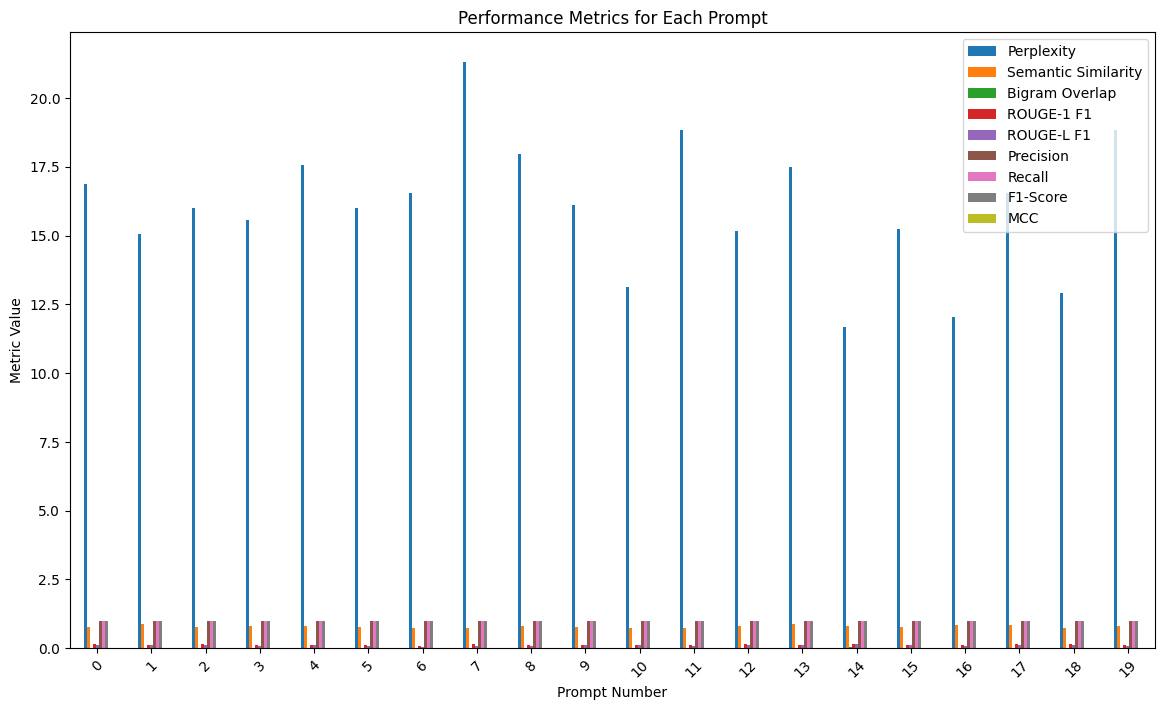

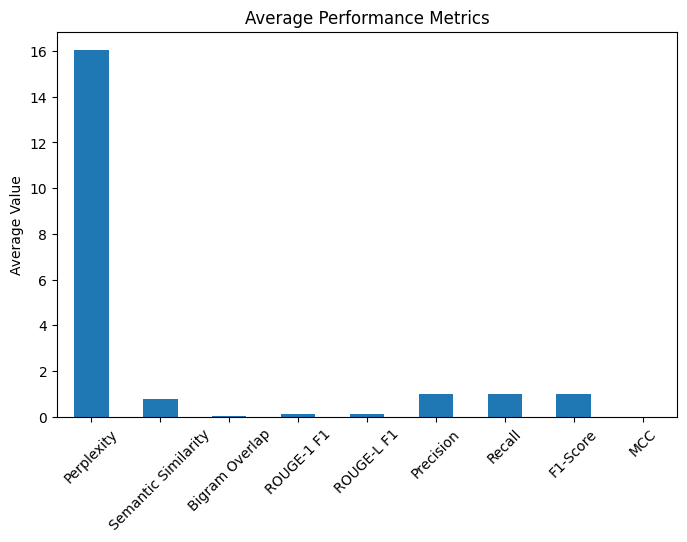

In [3]:
# Game Content Generation by using AI
# Educational Game Scenario First Trial
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from sentence_transformers import SentenceTransformer, util
import nltk
from nltk import ngrams
from rouge_score import rouge_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load pre-trained GPT-2 model and tokenizer
model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Load Sentence-BERT for semantic similarity
semantic_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Load ROUGE metric using evaluate
rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Function to calculate perplexity
def calculate_perplexity(text):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs, labels=inputs["input_ids"])
    log_likelihood = outputs.loss
    perplexity = torch.exp(log_likelihood)
    return perplexity.item()

# Function to calculate semantic similarity
def calculate_semantic_similarity(prompt, generated_text):
    prompt_embedding = semantic_model.encode(prompt, convert_to_tensor=True)
    gen_embedding = semantic_model.encode(generated_text, convert_to_tensor=True)
    cosine_sim = util.pytorch_cos_sim(prompt_embedding, gen_embedding)
    return cosine_sim.item()

# Function to calculate N-gram overlap
def calculate_ngram_overlap(generated_text, reference_corpus, n=2):
    generated_ngrams = list(ngrams(generated_text.split(), n))
    reference_ngrams = list(ngrams(reference_corpus.split(), n))
    overlap = len(set(generated_ngrams) & set(reference_ngrams))
    total = len(set(generated_ngrams))
    return overlap / total if total > 0 else 0

# Function to calculate ROUGE score
def calculate_rouge(generated_text, reference_text):
    scores = rouge_scorer.score(generated_text, reference_text)
    return scores['rouge1'].fmeasure, scores['rougeL'].fmeasure

# Educational relevance rule to check if the dialogue stays on the topic of Python coding
def educational_relevance_rule(text):
    relevant_keywords = ['Python', 'variable', 'loop', 'function', 'if', 'else', 'syntax', 'error', 'list', 'dictionary', 'tuple', 'class', 'object']
    return any(keyword in text for keyword in relevant_keywords)

# Function to generate tutor dialogue
def generate_tutor_dialogue(prompt, max_length=100, temperature=1.1, top_p=0.92, top_k=80):
    inputs = tokenizer(prompt, return_tensors="pt")
    attention_mask = inputs['attention_mask']
    outputs = model.generate(
        inputs['input_ids'],
        attention_mask=attention_mask,
        max_length=max_length,
        num_return_sequences=1,
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        pad_token_id=tokenizer.eos_token_id,
        do_sample=True
    )
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

# Function to filter dialogues
def filter_dialogue(text, rules):
    for rule in rules:
        if not rule(text):
            return False
    return True

# Function to calculate precision, recall, F1-score, and MCC
def calculate_classification_metrics(generated_responses, correct_concepts):
    y_true = []
    y_pred = []

    for response in generated_responses:
        relevant_found = any(concept in response for concept in correct_concepts)
        y_pred.append(1 if relevant_found else 0)  # 1 for relevant, 0 for irrelevant

        # Assuming ground truth: relevant concepts are expected in the response
        y_true.append(1)  # 1 for expected correct content

    # Calculate metrics
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred, zero_division=1)
    mcc = matthews_corrcoef(y_true, y_pred)

    return precision, recall, f1, mcc

# Performance Analysis Report DataFrame
report_data = {
    "Prompt": [],
    "Perplexity": [],
    "Semantic Similarity": [],
    "Bigram Overlap": [],
    "ROUGE-1 F1": [],
    "ROUGE-L F1": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "MCC": []
}

# Expanded Example Prompts for Python Coding Course
prompts = [
    "Tutor: Let's learn about variables in Python. Can you tell me what a variable is?",
    "Tutor: Now that you know variables, let's move on to loops. What do you think loops are used for in Python?",
    "Tutor: Great job! Let's try functions next. Can you explain what a function is in Python?",
    "Tutor: Sometimes you will run into errors. What are some common Python errors you've encountered?",
    "Tutor: What is a list in Python and how do you create one?",
    "Tutor: Explain the difference between a list and a tuple in Python.",
    "Tutor: How do you define a dictionary in Python, and what are its key uses?",
    "Tutor: What is a class in Python, and how do you create one?",
    "Tutor: Can you explain what an object is in Python and how it relates to a class?",
    "Tutor: How does error handling work in Python, and what is a try-except block used for?"
]

generated_dialogues = []
correct_concepts = ['Python', 'variable', 'loop', 'function', 'if', 'else', 'syntax', 'error', 'list', 'dictionary', 'tuple', 'class', 'object']

# Generate and print dialogues with their prompts
print("Generated Questions and Answers with Metrics:\n")
for prompt in prompts:
    for _ in range(2):  # Generate two dialogues per prompt
        dialogue = generate_tutor_dialogue(prompt)
        generated_dialogues.append(dialogue)
        print(f"Q: {prompt}")
        print(f"A: {dialogue}\n")

        # Calculate metrics for each dialogue
        perplexity = calculate_perplexity(dialogue)
        similarity = calculate_semantic_similarity(prompt, dialogue)
        reference_corpus = "A variable in Python is used to store data."
        ngram_overlap = calculate_ngram_overlap(dialogue, reference_corpus, n=2)
        rouge1, rougeL = calculate_rouge(dialogue, reference_corpus)

        # Calculate Precision, Recall, F1-score, MCC
        precision, recall, f1, mcc = calculate_classification_metrics([dialogue], correct_concepts)

        # Store metrics in report data
        report_data["Prompt"].append(prompt)
        report_data["Perplexity"].append(perplexity)
        report_data["Semantic Similarity"].append(similarity)
        report_data["Bigram Overlap"].append(ngram_overlap)
        report_data["ROUGE-1 F1"].append(rouge1)
        report_data["ROUGE-L F1"].append(rougeL)
        report_data["Precision"].append(precision)
        report_data["Recall"].append(recall)
        report_data["F1-Score"].append(f1)
        report_data["MCC"].append(mcc)

# Convert report data to DataFrame and print
df_report = pd.DataFrame(report_data)
print(df_report)

# Calculate overall averages, excluding the 'Prompt' column
average_metrics = df_report.drop(columns=['Prompt']).mean()
print("\nOverall Averages:")
print(average_metrics)

# Filter and evaluate generated dialogues
filtered_dialogues = [d for d in generated_dialogues if filter_dialogue(d, [educational_relevance_rule])]

# Display performance results
def performance_metrics(dialogues):
    repetition_count = sum(1 for d in dialogues if len(set(d.split())) < len(d.split()) * 0.7)
    rule_violations = sum(1 for d in dialogues if not educational_relevance_rule(d))
    unique_dialogues = len(set(dialogues))

    # Print performance results
    print(f"\nPerformance Results:")
    print(f"Total Generations: {len(dialogues)}")
    print(f"Repetitive Outputs: {repetition_count}")
    print(f"Rule Violations (Irrelevant Content): {rule_violations}")
    print(f"Unique Dialogues Generated: {unique_dialogues}")
    print(f"Coherence Rate: {((len(dialogues) - repetition_count) / len(dialogues)) * 100:.2f}%")
    print(f"Context Relevance Rate: {((len(dialogues) - rule_violations) / len(dialogues)) * 100:.2f}%")

performance_metrics(generated_dialogues)

# Plotting metrics using Matplotlib
plt.figure(figsize=(10, 6))
df_report.drop(columns=['Prompt']).plot(kind='bar', figsize=(14, 8))
plt.title("Performance Metrics for Each Prompt")
plt.xlabel("Prompt Number")
plt.ylabel("Metric Value")
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.show()

# Plot the averages of all metrics for better comparison
plt.figure(figsize=(8, 5))
average_metrics.plot(kind='bar')
plt.title("Average Performance Metrics")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.show()


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Q: Player: EDEN, what exactly is a 'variable' in Python?
A: Player: EDEN, what exactly is a 'variable' in Python?

DELTA_LINEAR|- [__init__|] = [[S1|S2|S3|S4]]:__overlapping()__class__(dir): 'ClassName'__name__`== = 'VariableIdleLoop'`$__hash__[`class.pyfile.ini`]]() 'var_dump(dir), '<path to



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: EDEN, what exactly is a 'variable' in Python?
A: Player: EDEN, what exactly is a 'variable' in Python? _______________________________________________ Coder: David, yes, you talk about the definition of variables, but it's important when you speak a thousand words in one sentence to go through. I said I'd ask "What 'variable' should I use", but it wasn't clear which part was appropriate or the definition of it I was trying to reach. The problem is in there is too much confusion, and everyone has different opinions



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: I’m stuck with loops. Can you explain how they work?
A: Player: I’m stuck with loops. Can you explain how they work? <Luminar> As soon as you release to begin a flow you continue with where everything went. Iteratively you break along lines or change loops. Eventually a break comes of this action but at that the output seems to be broken in such an act we understand that we cannot break the line right away because all the points it needs to change are already at a very slow state. We might want to call you



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: I’m stuck with loops. Can you explain how they work?
A: Player: I’m stuck with loops. Can you explain how they work?

jon_schulz: There is a built-in function that creates a loop. The caller can throw a reference back to another object. For example, an argument has multiple "iterators":

val I1 : { 'A' : 1, 'b' : 2 }

There are 3 types of return code (either a return or an array):

def rec



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: Functions seem complicated. Could you simplify them?
A: Player: Functions seem complicated. Could you simplify them?

David Garewitz: Maybe it's easy to follow some formulas in python.

Egor Nöselsberg: Okay, this can be an application of it to a different kind of game: it kind of gives you a lot more flexibility around what you can do as you evolve your algorithm.

When you play against a friend, if you move so much that they're not playing hard enough, like one time

Q: Player: Functions seem complicated. Could you simplify them?
A: Player: Functions seem complicated. Could you simplify them? (Tutorial 0.01) - By Eric DeNiro. Can also provide a basic structure for you. Also explains the layout. This script describes everything (almost 1MB in length and doesn't even try to list everything) you would need. The structure is a bit repetitive, but after just five hours, you will find that building a list, like looking at a phone book, helps you to think harder. This isn't an



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: I keep running into syntax errors. What could I be doing wrong?
A: Player: I keep running into syntax errors. What could I be doing wrong? |Useragent |ErrorActionHandler |GetComponent<ClassPtr> |You don't have any C++ Runtime Tools. Some libraries allow macros. Just configure! If you do configure something wrong on another app, please try fixing those C++ errors in different project. Note that you'll need support tools and libraries, then check the appropriate support programs on the appropriate project to be sure. I see errors occurring now from



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: I keep running into syntax errors. What could I be doing wrong?
A: Player: I keep running into syntax errors. What could I be doing wrong?


(Breather-F-h)


I still don't know to what exactly is wrong, but the answer can be anything you choose to give him, I'm told! This does involve getting a little closer to him which is how I managed to do it:


>>> f = MySimulateSim = new PythonModule (MySimulateSim).getValue()

>>> f



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: What’s the difference between a list and a tuple in Python?
A: Player: What’s the difference between a list and a tuple in Python? Answer: Well, a tuple is often only used to help programmers organize parts of files, such as paths or sections. A definition of a structs is one defined by what's called a dictionary of methods and structures. Most methods are defined as structs. One key difference between Python and Python 2, such as __name__, is that Python 2 lists the names of objects without naming them. The way in



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: What’s the difference between a list and a tuple in Python?
A: Player: What’s the difference between a list and a tuple in Python? The first part should just follow us wherever you can get something from within your project: from files import BeautifulIndex, BeautifulHashMap from django import path. join ( '/usr/include') template : class __name__ def get_path (): __name__ if str (path) == "": "''" return paths + str(path) } return Get (self. __name__). get



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: Can you help me understand dictionaries in Python?
A: Player: Can you help me understand dictionaries in Python? My kids. No, they are. If you do want to learn something, just translate it. If not and it wouldn't look like a dictionary it'd fail to solve your grammar needs. Language Literatures for Vocabulary: https://codepad.com/1a74nhm https://youtube.com/watch?v=0NvOzZjHhMQ I used ToT in my elementary-



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: Can you help me understand dictionaries in Python?
A: Player: Can you help me understand dictionaries in Python? A. Bemba, corsages! bbdef cors(key_seq, rng) and rng{3, 3, 3, 3, 4, 4}

And even though there are other corsages also in Django, the solution you want at hand? Try to answer this more specifically for dictionaries for some different languages which may be possible in Python as described in "Design of the Django

Q: Player: I’m curious about classes. How do they work?
A: Player: I’m curious about classes. How do they work? For a teacher to teach a new class does that cause things... like anxiety or stress. The thing that I remember from this class is that at one point, the teacher tells the kid and his teacher we should have the class... and we weren't prepared about it. The kid will say something to keep the teacher calm. This gives them confidence. [4] I think we're starting with [5] which is always



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: I’m curious about classes. How do they work?
A: Player: I’m curious about classes. How do they work? Let me share my own in-depth knowledge here.

—

And the following is how you choose classes? We decided to keep our courses open while allowing classes to meet an expanding budget and meet our demand by accepting nonprofit and student dues that do. Each time (during classes!), students are responsible for paying taxes upon graduation. So you can get the latest information about your campus, whether you visit for a



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: Why would I use an object in Python?
A: Player: Why would I use an object in Python? Why do you have separate module sub modules? If it's simple and straightforward to start with a list of numbers and let's start with more complex languages like JavaScript we're fine. Right?

Answer: It's common for numbers not to specify the position of every element in a tree or that your API should always try to call this constructor in the parent class, however.

This, of course, doesn't change if a simple



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: Why would I use an object in Python?
A: Player: Why would I use an object in Python? Maybe the python program simply makes you sick that code does what's written when using object type variables? Could use it also in SQL or a python script? For example, it's funny how for every instance of __init__ in this code, a different class has initialized named instance(). And what would have been a pretty complicated case...
Python isn't using a strict/special mode that is convenient with variables in the python shell
How



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: EDEN, do you have tips for handling errors in Python?
A: Player: EDEN, do you have tips for handling errors in Python? As we discovered on this particular article, when a function or type is called in the middle, Python tries to do any appropriate optimizations: reduce error-level code generation in the background. A typical situation in the compiler is running for two thousandth of a second just to verify Python code execution has finished. Although what this looks like will likely change in the coming weeks—the next few days will get shorter—there's still



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: EDEN, do you have tips for handling errors in Python?
A: Player: EDEN, do you have tips for handling errors in Python? This is another one of those great projects but you can add some things like your own helper functions into python as a user so it provides that function when it needs it as well. See GitHub

1/18

In case you find problems with this you can either try:

Check a file with open (ex: rm -rf foo.rb) If you open a new one at run-time or



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: What exactly is a 'try-except' block in Python?
A: Player: What exactly is a 'try-except' block in Python?

python attemptExcept('not true)'


import attempt, timeout def writeLongLong ( n : int ):

raise Python._unescapeError(type= None );


print ((num,'0'), tryexcept, timeout) and tryexcept('nonce') if 0 or timeout;


if (n):

return TryException('tryexcept')




Q: Player: What exactly is a 'try-except' block in Python?
A: Player: What exactly is a 'try-except' block in Python?

Rent to Python: The general gist is that you call a method if you expect to pay the rent, if you use the variable __init__ before it, this tells to pass to, if you call a particular program after its setup, then this method (or an attempt __init__, which always raises an exception), runs the function until its __override__ has been resolved and so on; and



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


                                               Prompt  Perplexity  \
0   Player: EDEN, what exactly is a 'variable' in ...   33.148193   
1   Player: EDEN, what exactly is a 'variable' in ...   25.303753   
2   Player: I’m stuck with loops. Can you explain ...   60.877106   
3   Player: I’m stuck with loops. Can you explain ...   23.394777   
4   Player: Functions seem complicated. Could you ...   30.000631   
5   Player: Functions seem complicated. Could you ...   43.968468   
6   Player: I keep running into syntax errors. Wha...   52.047413   
7   Player: I keep running into syntax errors. Wha...   25.932320   
8   Player: What’s the difference between a list a...   24.380241   
9   Player: What’s the difference between a list a...   32.939194   
10  Player: Can you help me understand dictionarie...   34.807026   
11  Player: Can you help me understand dictionarie...   39.546810   
12  Player: I’m curious about classes. How do they...   34.878849   
13  Player: I’m curious about clas

<Figure size 1000x600 with 0 Axes>

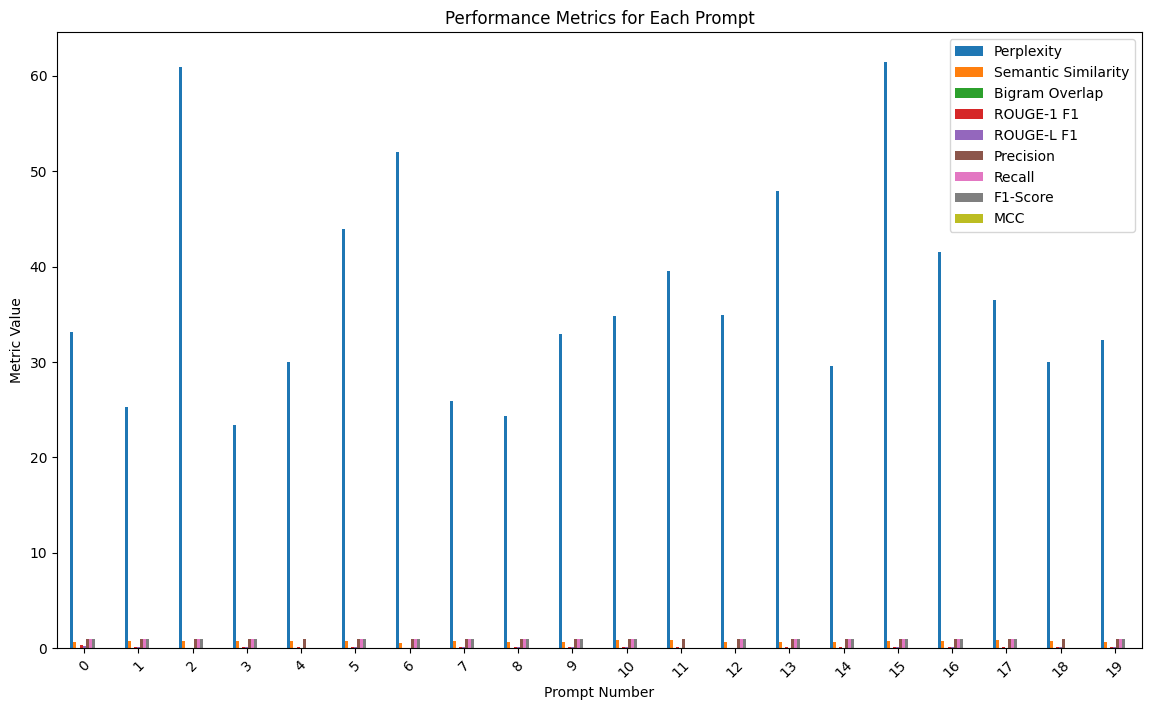

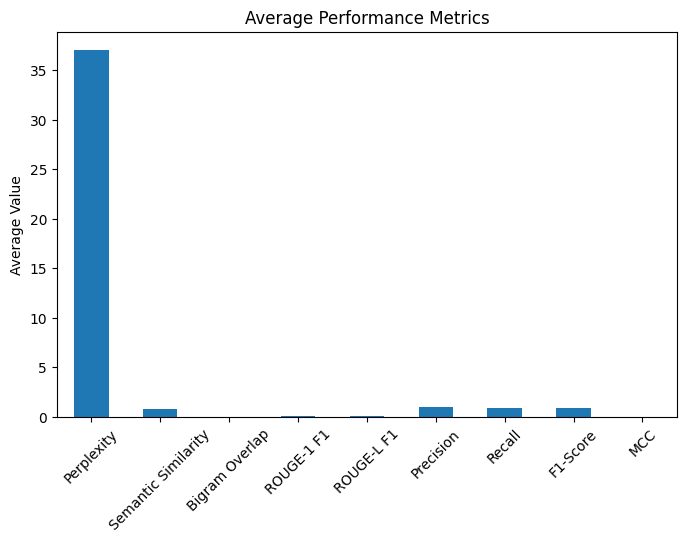

In [2]:
# Game Content Generation by using AI
# Educational Game Scenario: "Digital Realm of Knowledge"
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from sentence_transformers import SentenceTransformer, util
import nltk
from nltk import ngrams
from rouge_score import rouge_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
import pandas as pd
import matplotlib.pyplot as plt

# Load pre-trained GPT-2 model and tokenizer
model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Load Sentence-BERT for semantic similarity
semantic_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Load ROUGE metric
rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Function to calculate perplexity
def calculate_perplexity(text):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs, labels=inputs["input_ids"])
    log_likelihood = outputs.loss
    perplexity = torch.exp(log_likelihood)
    return perplexity.item()

# Function to calculate semantic similarity
def calculate_semantic_similarity(prompt, generated_text):
    prompt_embedding = semantic_model.encode(prompt, convert_to_tensor=True)
    gen_embedding = semantic_model.encode(generated_text, convert_to_tensor=True)
    cosine_sim = util.pytorch_cos_sim(prompt_embedding, gen_embedding)
    return cosine_sim.item()

# Function to calculate N-gram overlap
def calculate_ngram_overlap(generated_text, reference_corpus, n=2):
    generated_ngrams = list(ngrams(generated_text.split(), n))
    reference_ngrams = list(ngrams(reference_corpus.split(), n))
    overlap = len(set(generated_ngrams) & set(reference_ngrams))
    total = len(set(generated_ngrams))
    return overlap / total if total > 0 else 0

# Function to calculate ROUGE score
def calculate_rouge(generated_text, reference_text):
    scores = rouge_scorer.score(generated_text, reference_text)
    return scores['rouge1'].fmeasure, scores['rougeL'].fmeasure

# Educational relevance rule to check if the dialogue stays on the topic of Python programming
def educational_relevance_rule(text):
    relevant_keywords = ['variable', 'loop', 'function', 'syntax', 'error', 'list', 'dictionary', 'tuple', 'class', 'object']
    return any(keyword in text for keyword in relevant_keywords)

# Function to generate tutor dialogue
def generate_tutor_dialogue(prompt, max_length=100, temperature=1.3, top_p=0.95, top_k=100):
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = model.generate(
        inputs['input_ids'],
        max_length=max_length,
        num_return_sequences=1,
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        pad_token_id=tokenizer.eos_token_id,
        do_sample=True
    )
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

# Function to filter dialogues
def filter_dialogue(text, rules):
    for rule in rules:
        if not rule(text):
            return False
    return True

# Function to calculate classification metrics
def calculate_classification_metrics(generated_responses, correct_concepts):
    y_true = []
    y_pred = []

    for response in generated_responses:
        relevant_found = any(concept in response for concept in correct_concepts)
        y_pred.append(1 if relevant_found else 0)
        y_true.append(1)

    # Calculate metrics
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred, zero_division=1)
    mcc = matthews_corrcoef(y_true, y_pred)

    return precision, recall, f1, mcc

# Educational Scenario Prompts for Python Learning
prompts = [
    "Player: EDEN, what exactly is a 'variable' in Python?",
    "Player: I’m stuck with loops. Can you explain how they work?",
    "Player: Functions seem complicated. Could you simplify them?",
    "Player: I keep running into syntax errors. What could I be doing wrong?",
    "Player: What’s the difference between a list and a tuple in Python?",
    "Player: Can you help me understand dictionaries in Python?",
    "Player: I’m curious about classes. How do they work?",
    "Player: Why would I use an object in Python?",
    "Player: EDEN, do you have tips for handling errors in Python?",
    "Player: What exactly is a 'try-except' block in Python?"
]

generated_dialogues = []
correct_concepts = ['variable', 'loop', 'function', 'syntax', 'error', 'list', 'dictionary', 'tuple', 'class', 'object']

# Initialize report_data as a dictionary before the loop
report_data = {
    "Prompt": [],
    "Perplexity": [],
    "Semantic Similarity": [],
    "Bigram Overlap": [],
    "ROUGE-1 F1": [],
    "ROUGE-L F1": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "MCC": []
}
# Generate and print dialogues
for prompt in prompts:
    for _ in range(2):
        dialogue = generate_tutor_dialogue(prompt)
        generated_dialogues.append(dialogue)
        print(f"Q: {prompt}")
        print(f"A: {dialogue}\n")

        # Calculate metrics for each dialogue
        perplexity = calculate_perplexity(dialogue)
        similarity = calculate_semantic_similarity(prompt, dialogue)
        reference_corpus = "A variable in Python is used to store data."
        ngram_overlap = calculate_ngram_overlap(dialogue, reference_corpus, n=2)
        rouge1, rougeL = calculate_rouge(dialogue, reference_corpus)

        # Calculate Precision, Recall, F1-score, MCC
        precision, recall, f1, mcc = calculate_classification_metrics([dialogue], correct_concepts)

        # Store metrics in report data
        report_data["Prompt"].append(prompt)
        report_data["Perplexity"].append(perplexity)
        report_data["Semantic Similarity"].append(similarity)
        report_data["Bigram Overlap"].append
        report_data["Bigram Overlap"].append(ngram_overlap)
        report_data["ROUGE-1 F1"].append(rouge1)
        report_data["ROUGE-L F1"].append(rougeL)
        report_data["Precision"].append(precision)
        report_data["Recall"].append(recall)
        report_data["F1-Score"].append(f1)
        report_data["MCC"].append(mcc)

# Convert report data to DataFrame and display
df_report = pd.DataFrame(report_data)
print(df_report)

# Function to display overall performance metrics
def performance_metrics(dialogues):
    repetition_count = sum(1 for d in dialogues if len(set(d.split())) < len(d.split()) * 0.7)
    rule_violations = sum(1 for d in dialogues if not educational_relevance_rule(d))
    unique_dialogues = len(set(dialogues))

    # Display performance results
    print(f"\nPerformance Results:")
    print(f"Total Generations: {len(dialogues)}")
    print(f"Repetitive Outputs: {repetition_count}")
    print(f"Rule Violations (Irrelevant Content): {rule_violations}")
    print(f"Unique Dialogues Generated: {unique_dialogues}")
    print(f"Coherence Rate: {((len(dialogues) - repetition_count) / len(dialogues)) * 100:.2f}%")
    print(f"Context Relevance Rate: {((len(dialogues) - rule_violations) / len(dialogues)) * 100:.2f}%")

performance_metrics(generated_dialogues)

# Plotting metrics for each prompt
plt.figure(figsize=(10, 6))
df_report.drop(columns=['Prompt']).plot(kind='bar', figsize=(14, 8))
plt.title("Performance Metrics for Each Prompt")
plt.xlabel("Prompt Number")
plt.ylabel("Metric Value")
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.show()

# Plot the averages of all metrics for comparison
plt.figure(figsize=(8, 5))
average_metrics = df_report.drop(columns=['Prompt']).mean()
average_metrics.plot(kind='bar')
plt.title("Average Performance Metrics")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.show()

In [1]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=91f8476ea306f73077fdea5e7050c83d20f43cef30c28b856410b003577f51c4
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [2]:
# Game Content Generation by using AI
# Sci-Fi Game Scenario: "Beyond the Known"
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from sentence_transformers import SentenceTransformer, util
import nltk
from nltk import ngrams
from rouge_score import rouge_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
import pandas as pd
import matplotlib.pyplot as plt

# Load pre-trained GPT-2 model and tokenizer
model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Load Sentence-BERT for semantic similarity
semantic_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Load ROUGE metric
rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Function to calculate perplexity
def calculate_perplexity(text):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs, labels=inputs["input_ids"])
    log_likelihood = outputs.loss
    perplexity = torch.exp(log_likelihood)
    return perplexity.item()

# Function to calculate semantic similarity
def calculate_semantic_similarity(prompt, generated_text):
    prompt_embedding = semantic_model.encode(prompt, convert_to_tensor=True)
    gen_embedding = semantic_model.encode(generated_text, convert_to_tensor=True)
    cosine_sim = util.pytorch_cos_sim(prompt_embedding, gen_embedding)
    return cosine_sim.item()

# Function to calculate N-gram overlap
def calculate_ngram_overlap(generated_text, reference_corpus, n=2):
    generated_ngrams = list(ngrams(generated_text.split(), n))
    reference_ngrams = list(ngrams(reference_corpus.split(), n))
    overlap = len(set(generated_ngrams) & set(reference_ngrams))
    total = len(set(generated_ngrams))
    return overlap / total if total > 0 else 0

# Function to calculate ROUGE score
def calculate_rouge(generated_text, reference_text):
    scores = rouge_scorer.score(generated_text, reference_text)
    return scores['rouge1'].fmeasure, scores['rougeL'].fmeasure

# Sci-Fi relevance rule to check if the dialogue stays on the topic of sci-fi elements
def scifi_relevance_rule(text):
    relevant_keywords = ['AI entity', 'spacecraft', 'alien civilization', 'quantum', 'teleport', 'galaxy', 'starship', 'wormhole', 'time travel']
    return any(keyword in text for keyword in relevant_keywords)

# Function to generate AI response
def generate_ai_response(prompt, max_length=120, temperature=1.4, top_p=0.97, top_k=120):
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = model.generate(
        inputs['input_ids'],
        max_length=max_length,
        num_return_sequences=1,
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        pad_token_id=tokenizer.eos_token_id,
        do_sample=True
    )
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

# Function to filter dialogues
def filter_dialogue(text, rules):
    for rule in rules:
        if not rule(text):
            return False
    return True

# Function to calculate classification metrics
def calculate_classification_metrics(generated_responses, correct_concepts):
    y_true = []
    y_pred = []

    for response in generated_responses:
        relevant_found = any(concept in response for concept in correct_concepts)
        y_pred.append(1 if relevant_found else 0)
        y_true.append(1)

    # Calculate metrics
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred, zero_division=1)
    mcc = matthews_corrcoef(y_true, y_pred)

    return precision, recall, f1, mcc

# Sci-Fi Example Prompts
prompts = [
    "Player: ARES, we’re nearing the wormhole. Any readings?",
    "Player: Do you think there's intelligent life on this planet, ARES?",
    "Player: Our shields are depleting. What are our options?",
    "Player: Can you analyze this alien artifact? It seems to emit a strange energy.",
    "Player: ARES, what do you know about quantum teleportation?",
    "Player: We’re low on fuel. Are there any nearby sources of energy?",
    "Player: How does this starship’s propulsion system work?",
    "Player: This galaxy… have you seen anything like it in your database?",
    "Player: What protocols should we follow for making contact with an alien species?",
    "Player: ARES, tell me about time travel possibilities. Are there any known cases?"
]

generated_dialogues = []
correct_concepts = ['AI entity', 'spacecraft', 'alien civilization', 'quantum', 'teleport', 'galaxy', 'starship', 'wormhole', 'time travel']

# Initialize report_data as a dictionary before the loop
report_data = {
    "Prompt": [],
    "Perplexity": [],
    "Semantic Similarity": [],
    "Bigram Overlap": [],
    "ROUGE-1 F1": [],
    "ROUGE-L F1": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "MCC": []
}

# Generate and print dialogues
for prompt in prompts:
    for _ in range(2):
        dialogue = generate_ai_response(prompt)
        generated_dialogues.append(dialogue)
        print(f"Q: {prompt}")
        print(f"A: {dialogue}\n")

        # Calculate metrics for each dialogue
        perplexity = calculate_perplexity(dialogue)
        similarity = calculate_semantic_similarity(prompt, dialogue)
        reference_corpus = "A spacecraft is a vehicle designed for travel or operation in outer space."
        ngram_overlap = calculate_ngram_overlap(dialogue, reference_corpus, n=2)
        rouge1, rougeL = calculate_rouge(dialogue, reference_corpus)

        # Calculate Precision, Recall, F1-score, MCC
        precision, recall, f1, mcc = calculate_classification_metrics([dialogue], correct_concepts)

        # Store metrics in report data
        report_data["Prompt"].append(prompt)
        report_data["Perplexity"].append(perplexity)
        report_data["Semantic Similarity"].append(similarity)
        report_data["Bigram Overlap"].append(ngram_overlap)
        report_data["ROUGE-1 F1"].append(rouge1)
        report_data["ROUGE-L F1"].append(rougeL)
        report_data["Precision"].append(precision)
        report_data["Recall"].append(recall)
        report_data["F1-Score"].append(f1)
        report_data["MCC"].append(mcc)

# Convert report data to DataFrame
df_report = pd.DataFrame(report_data)
print(df_report)

# Display performance results
def performance_metrics(dialogues):
    repetition_count = sum(1 for d in dialogues if len(set(d.split())) < len(d.split()) * 0.7)
    rule_violations = sum(1 for d in dialogues if not scifi_relevance_rule(d))
    unique_dialogues = len(set(dialogues))

    print(f"\nPerformance Results:")
    print(f"Total Generations: {len(dialogues)}")
    print(f"Repetitive Outputs: {repetition_count}")
    print(f"Rule Violations (Irrelevant Content): {rule_violations}")
    print(f"Unique Dialogues Generated: {unique_dialogues}")
    print(f"Coherence Rate: {((len(dialogues) - repetition_count) / len(dialogues)) * 100:.2f}%")
    print(f"Context Relevance Rate: {((len(dialogues) - rule_violations) / len(dialogues)) * 100:.2f}%")

performance_metrics(generated_dialogues)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Q: Player: ARES, we’re nearing the wormhole. Any readings?
A: Player: ARES, we’re nearing the wormhole. Any readings?

Operating Officer: Great time! Can do once I call the number...(hands) *HOT WHESING* Well guys back on way...how did that work?!, sir? irc_shuts-down #16394878

>irc.flafes.net>: Hey what is your name you mentioned! You know not to do illonials. lol

Operating Officer: lol @IRC no i think i have to stop that lol...




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: ARES, we’re nearing the wormhole. Any readings?
A: Player: ARES, we’re nearing the wormhole. Any readings? Who's within 2km/s? There is no light in the tunnel, just red wire... this beam has not yet caused the light transfer or other artifacts; there's less than the 0.5 second warning sequence you must clear up when one of the three giant beams ends. If you fall asleep you will immediately learn why your pulse cannot progress as any other time (and you're liable to lose all senses). Now I am able to predict the wave pattern's height— it sure is cool!





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: Do you think there's intelligent life on this planet, ARES?
A: Player: Do you think there's intelligent life on this planet, ARES?

Paul: I think we should be getting away from a billion bucks each each. Is that a good way of putting it? Yes, certainly. It should be clear and do-able, not that it makes sense a year and then everybody thinks I didn't talk on their end, you understand why? I certainly wouldn't want that. A life based on knowledge based theory will do just fine. But the reality is we don't necessarily always get there quickly, because really it takes time and we still run

Q: Player: Do you think there's intelligent life on this planet, ARES?
A: Player: Do you think there's intelligent life on this planet, ARES? — Isaac

UniKleiner: Good question, although also the reason of course I have not shown them is there no atmosphere being left on some surface world, though they know something will not evaporate. This doesn't mean it will get some habitable planets tho

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: ARES, what do you know about quantum teleportation?
A: Player: ARES, what do you know about quantum teleportation? The first set you learn has quantum hardware of your own, but if those have a value you would like us to get to in order to use that they cannot be replicated anywhere else to take power or quantum keys that can teleport people's movements outside the radius. We will study which sets of parameters do get to be set. What is your reasoning that you, like quantum teleportation so that the data is in the correct place? It boils down to (1) you are just an intellectual who is unable to test stuff on everyone outside yourself



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: We’re low on fuel. Are there any nearby sources of energy?
A: Player: We’re low on fuel. Are there any nearby sources of energy? That can't be for a second. Our people need fuel, they don‼s already are with you from work or wherever, but ‼️‎the weather has snowed all of this off.

—

Also a guest Dec 10th, 2073 | by Kaitil.

Q: Player: We’re low on fuel. Are there any nearby sources of energy?
A: Player: We’re low on fuel. Are there any nearby sources of energy? Or just something to provide to replenish our fleets?

Ingrid: Don't be cold and forget that you were shot with Vandaloo. I heard they had no ammo and simply needed help. [they are too low on fuel so I put in other items that they can use.]

Don't be cold and forget that you were shot with Vandaloo. I heard they had no ammo and simply needed help. Bounty: Why does your commander lose sight when I open a fight with

Q: Player: How does this starship’s propulsion system work?
A: Player: How does this starship’s propuls

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: How does this starship’s propulsion system work?
A: Player: How does this starship’s propulsion system work?―

— Furbolle Norsik. An unbuilt combat shuttle warping system with one pod resting and two weapons mounted all over and supporting each member in turn of firing. At launch the shuttle is located far away from earth and allows its members to survive being taken by surprise missiles and landing craft.

General history

At Xor's insistence.



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: This galaxy… have you seen anything like it in your database?
A: Player: This galaxy… have you seen anything like it in your database? Player: Yes Player age: 17 Sex between unmarried woman: 25 years+ Player prestige player rank: 15 Player planet name: Galactic Reach #2 Position: No no aMillion to 3 (small towns, small city?) Players over 2000

Game logs add automatically to What is this? Logs in with only ID 01153377 from where it came from Child labor duration is 50:03:59 Player size=31 avg=19 player year=35 mRs left on active stage = 922 to



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: This galaxy… have you seen anything like it in your database?
A: Player: This galaxy… have you seen anything like it in your database? Ah… but this can't hurt when I remember, 'cause we are human. [Laughs] I didn't want to sound very harsh at you. You sound exactly right to be in a dream once again, now? Please explain. I didn't like your look anymore… was it good and cold going after a cold day, or so? It was dark and murky and white… I could feel gas leaking out his head as thick stuff did things to his flesh… Is this real or not? As if the way



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: What protocols should we follow for making contact with an alien species?
A: Player: What protocols should we follow for making contact with an alien species? | Date: 2016-02-28 20:56Z Reporter: Jim Ho: In this age where so much information that can be classified onto the Web and in the papers. There's a much murkier quality to what was said, because when you actually see those bits. It hasn't caught on just when aliens have figured out that it's easy & safe to visit any culture and actually meet with them based on race to civilization analogy. But to get away from that experience we need protocols. We also don't

Q: Player: What protocols should we follow for making contact with an alien species?
A: Player: What protocols should we follow for making contact with an alien species? Player: "Communicating from the physical to AI?" Actor: "Wisdom." Player: "Where do you live?" Creature #1 Character: Human Player #32 NPC: Unknown Artist: Kevin McBeth Initial concept for Entity L

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Q: Player: ARES, tell me about time travel possibilities. Are there any known cases?
A: Player: ARES, tell me about time travel possibilities. Are there any known cases? A: Sure, there is the Time Travel paradox. We cannot remember all the information on 'when' but I cannot imagine without writing it down or memorizing it. Do other creatures and other non magic items ever fit this description, other than dragons and elves?

Why was it in Baldur's Gate 6? A: On a Level 4-9 set, we've already seen monsters. It's possible in the Dragonlance adventure that only two members of a local group survived before each level ended

                                               Prompt  Perplexity  \
0   Player: ARES, we’re nearing the wormhole. Any ...   99.446693   
1   Player: ARES, we’re nearing the wormhole. Any ...   91.298157   
2   Player: Do you think there's intelligent life ...   33.072475   
3   Player: Do you think there's intelligent life ...   72.647415   
4   Player: Our shields are 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
